In [12]:
%run "InfDif.ipynb"

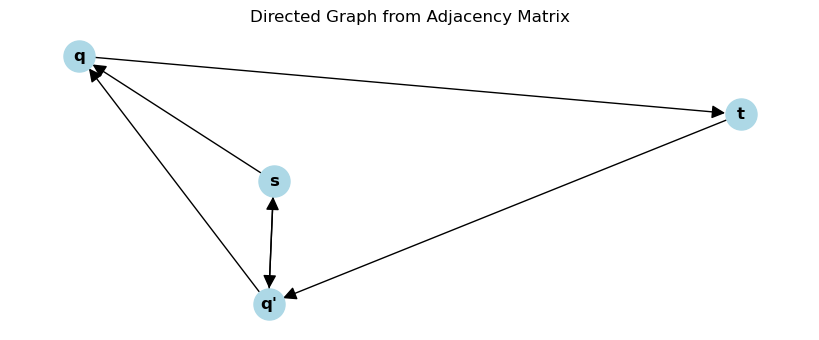

In [13]:
# 定义邻接矩阵
Adj_matrix = np.array([[0, 1, 0, 1],
                       [0, 0, 1, 0],
                       [0, 0, 0, 1],
                       [1, 1, 0, 0]])

# 创建有向图
G = nx.from_numpy_array(Adj_matrix, create_using=nx.DiGraph)

labels = {0: "s", 1: "q", 2: "t", 3:"q'"}

# 更新图中节点的 'label' 属性
for node, label in labels.items():
    G.nodes[node]['label'] = label

# 绘制图
plt.figure(figsize=(8, 3))
pos = nx.fruchterman_reingold_layout(G)  # 使用spring布局算法来确定节点的位置
nx.draw(G, pos, labels=nx.get_node_attributes(G, 'label'), node_color='lightblue', node_size=500, font_size=12, font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=20)
plt.title("Directed Graph from Adjacency Matrix")
plt.show()

In [14]:
M = 0.5 * Adj_matrix
Rho = compute_rho(M,tol=1e-1)
print(Rho)
print(sum(Rho[0]))

num_iterations =  19
[[0.         0.63833974 0.14059401 0.53543112]
 [0.         0.         0.5        0.        ]
 [0.31146246 0.42242381 0.         0.58057756]
 [0.5        0.5        0.         0.        ]]
1.3143648587966918


In [8]:
def new_compute_rho(M, tol=1e-2):
    n = M.shape[0]
    Ones = np.ones_like(M)
    ones = np.ones(n)
    M_t= M.T
    
    rho_prev = np.zeros_like(M)
    rho = M.copy()
    Rho = M.copy() 

    # 初始化 rho 和 rho_prev
    rho = M.copy()

    for k in range(3):
        # 计算 (1 - rho * M_t) 的乘积
        prod = np.prod(1 - rho[:, None, :] * M_t[None, :, :], axis=2)
        # 更新 rho
        rho = 1 - prod
        # 对角线元素保持不变
        np.fill_diagonal(rho, 0)
        Rho += rho 
        print(f"{k+2}_rho:\n", rho)
 
    return Rho

In [30]:
def new_compute_rho(M, tol=1e-2):
    n = M.shape[0]
    M_t = M.T  # Transpose of the adjacency matrix
    Rho = M.copy()  # Final influence matrix

    # Initialize rho
    rho = M.copy()

    for k in range(3):  # Iterate over a few steps
        # Create a temporary rho for each iteration
        rho_new = np.ones_like(M)  # Start with a matrix of ones

        # For each pair (i, j), compute the product incrementally
        for i in range(n):
            for j in range(n):
                if i != j:
                    prod = 1.0
                    for l in range(n):
                        if l != i and l != j:
                            prod *= (1 - rho[i, l] * M_t[j, l])
                    rho_new[i, j] = 1 - prod

        # Update rho and accumulate the result in Rho
        rho = rho_new
        np.fill_diagonal(rho, 0)  # Ensure diagonal elements remain zero
        Rho += rho
        
        # Debugging information (optional)
        print(f"{k + 1}_rho:\n", rho)

    return Rho

def Expected_Activated_Matrix(G,decision_dict,Rho):
    Rho = np.copy(Rho)
    nodes_list = list(G.nodes())
    selected_nodes = list(decision_dict.keys())
    decisions = list(decision_dict.values())
    index = [nodes_list.index(node) for node in selected_nodes]
    Exp = sum(decisions)
    
    for i in range(len(index)):
        Rho[index[i]] *= decisions[i]
    
    for o in range(Rho.shape[0]):
        if o not in index:
            _ = 1
            for i in index:
                _ *= 1-Rho[i,o]
            Exp += 1-_
            
    return Exp   

In [32]:
M = 0.5 * Adj_matrix
Rho = new_compute_rho(M,tol=1e-4)

1_rho:
 [[0.   0.25 0.25 0.  ]
 [0.   0.   0.   0.25]
 [0.25 0.25 0.   0.  ]
 [0.   0.25 0.25 0.  ]]
2_rho:
 [[0.    0.    0.125 0.125]
 [0.125 0.    0.    0.   ]
 [0.    0.125 0.    0.125]
 [0.    0.    0.125 0.   ]]
3_rho:
 [[0.     0.0625 0.     0.0625]
 [0.     0.     0.     0.0625]
 [0.0625 0.0625 0.     0.    ]
 [0.     0.     0.     0.    ]]


In [33]:
print(Rho)

[[0.     0.8125 0.375  0.6875]
 [0.125  0.     0.5    0.3125]
 [0.3125 0.4375 0.     0.625 ]
 [0.5    0.75   0.375  0.    ]]


In [41]:
a=Expected_Activated_Matrix(G,{0:1},Rho)
print(a)

2.875


In [ ]:
def compute_rho(M, tol=1e-3):
    n = M.shape[0]
    Ones = np.ones_like(M)
    ones = np.ones(n)
    M_t= M.T
    
    rho_prev = np.zeros_like(M)
    rho = M.copy()
    Rho = Ones - rho
    
    for k in range(1, 20):
        for i in range(n):
            for j in range(n):
                if i!=j:
                    rho_prev = ones - rho[i,:] * M_t[j,:] 
                    rho[i,j] = 1 - np.prod(rho_prev) 
                    
        if np.allclose(rho, rho_prev, atol=tol):
            break

        rho_prev = rho.copy()
        Rho *= (Ones-rho)
    print('num_iterations = ',k)
    Rho = Ones - Rho
    return Rho

In [30]:
a = np.array([0,0.5]) 
b = np.array([1, 1])
print(a*b)

[0.  0.5]


In [48]:
for i in range(1,5):
    print(i)

1
2
3
4


In [79]:
M = 0.5 * Adj_matrix
n = M.shape[0]
Ones = np.ones_like(M)
ones = np.ones(n)
M_t= M.T

rho_prev = np.zeros_like(M)
rho = M.copy()
Rho = Ones - rho
for k in range(0, 3):
    for i in range(0,n):
        for j in range(0,n):
            if i != j:
                temp = 1 - np.prod(ones - rho[i,:] * M_t[j,:])
                rho_prev[i,j] = temp
    rho = rho_prev.copy()
    print(f"{k+2}_rho:\n",rho)

2_rho:
 [[0.   0.25 0.25 0.  ]
 [0.   0.   0.   0.25]
 [0.25 0.25 0.   0.  ]
 [0.   0.25 0.25 0.  ]]
3_rho:
 [[0.    0.    0.125 0.125]
 [0.125 0.    0.    0.   ]
 [0.    0.125 0.    0.125]
 [0.    0.    0.125 0.   ]]
4_rho:
 [[0.     0.0625 0.     0.0625]
 [0.     0.     0.     0.0625]
 [0.0625 0.0625 0.     0.    ]
 [0.     0.     0.     0.    ]]


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 文件路徑列表
file_paths = [
    r'F:\Jupyter\Social network\ForPaper_ending\1v1\1_socfb-Caltech36.txt_result.txt',
    r'F:\Jupyter\Social network\ForPaper_ending\1v1\1_socfb-Bowdoin47.txt_L=6_result.txt',
    r'F:\Jupyter\Social network\ForPaper_ending\1v1\1_socfb-Amherst41.txt_L=6_result.txt',
    r'F:\Jupyter\Social network\ForPaper_ending\1v1\1_socfb-Brandeis99.txt_result.txt',
    r'F:\Jupyter\Social network\ForPaper_ending\1v1\1_socfb-American75.txt_result.txt'
]

# 對應類別名稱
categories = ['Caltech36', 'Bowdoin47', 'Amherst41', 'Brandeis99', 'American75']

# 輸出文件夾
output_folder = "F:/Jupyter/Social network/ForPaper_ending"
os.makedirs(output_folder, exist_ok=True)

# 標題字體設置
title_font = {
    'size': 40,
    'weight': 'bold',
    'family': 'serif',
    'color': 'blue'
}

# 函數: 移除 IQR 範圍外的異常值 (假設此函數已有實現)
def remove_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (data >= lower_bound) & (data <= upper_bound) & (data>5)

# 結果數據存儲
results_ea = []
all_re_exp = []

# 讀取數據並計算殘差
for i, file in enumerate(file_paths):
    data = pd.read_csv(file, sep=' ', header=None)

    act = data.iloc[:, 0]  # 真實值
    re_exp = data.iloc[:, 1]  # 預期值

    # 剔除 re_exp 中的異常值
    mask = remove_outliers_iqr(re_exp)
    re_exp = re_exp[mask]
    act = act[mask]

    # 計算相對殘差
    residuals_ea = list(zip(re_exp, act - re_exp))
    results_ea.append(residuals_ea)

    # 存儲 re_exp 用於後續繪圖
    all_re_exp.append(re_exp)

# 繪製殘差圖
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)
axes = axes.flatten()

for idx, residual_data in enumerate(results_ea):
    if idx >= 5:  # 只處理5個文件
        break

    re_exp = [pair[0] for pair in residual_data]
    residuals_ea = [pair[1] for pair in residual_data]
    relative_residuals_ea = np.array(residuals_ea) / np.array(re_exp)
    mae_ea = np.mean(np.abs(relative_residuals_ea))
    std_dev_ea = np.std(relative_residuals_ea)

    # 移除極端值 (3個標準差範圍內)
    mask_ea = (relative_residuals_ea >= -3 * std_dev_ea) & (relative_residuals_ea <= 3 * std_dev_ea)
    relative_residuals_ea = relative_residuals_ea[mask_ea]
    re_exp = np.array(re_exp)[mask_ea]

    # 繪製散點圖
    ea_label = f'Expectation vs. Simulation'
    axes[idx].scatter(re_exp, relative_residuals_ea, marker='D', s=70, c='red', edgecolor='black', alpha=0.6, label=ea_label)
    axes[idx].axhline(y=0, color='r', linestyle='--')
    axes[idx].set_xlim(min(re_exp) - 10, max(re_exp) + 10)
    axes[idx].set_ylim(-1, 1)
    axes[idx].set_xlabel('Expected Value')
    axes[idx].set_ylabel('Relative Residuals')
    axes[idx].set_title(f'{categories[idx]}, MAE={mae_ea:.2f}, STD={std_dev_ea:.2f}')
    axes[idx].legend()

# 移除未用的第6個子圖
fig.delaxes(axes[5])

# 添加總標題
plt.suptitle('Residual Plot for 5 Networks', fontdict=title_font)

# 調整佈局
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 保存並關閉 (只保存一次)
plt.savefig(os.path.join(output_folder, 'combined_network_residual_plot.png'))

plt.close()